<a href="https://colab.research.google.com/github/williansmprimo/visao_computacional/blob/main/reconhecimento_base_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reconhecimento de Imagens utilizando a Base MNIST
Neste trabalho é apresentado uso de Redes Neurais Multicamadas com a utilização de Camadas de Convolução

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
%matplotlib inline

No techo de código a seguir é feita a separação da base em Treinamento e Teste e também a criação de um Array com as classes, no caso, o sdígitos de 0 a 9.
Além disso, é feita a divisão dos valores corrspodentes a intensidade dos pixels por 255, com o objetivo de tornar as entradas no intervalo [0, 1], o que permite um ajuste do modelo mais rápido e eficiente.

In [23]:
class_names = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
(x_train, y_train), (x_test, y_test) = mnist.load_data()
model_size = (x_train[0].shape[0], x_train[0].shape[1], 1)  #28, 28, 1
layer_size = 1024
out_size = class_names.shape[0]

x_test_original = x_test
x_train = x_train / 255
x_test = x_test / 255
model_size

(28, 28, 1)

No código a seguir é feita a criação do modelo, onde são utilizadas a seguintes camadas:

<b>Conv2D</b>: Camada de convolução 2D, onde é aplicado um filtro de do timo convolução na imagem.

<b>MaxPool2D</b>: Essa camada funciona como uma espécie de compactação da entrada por meio da seleção do maior valor dentro de um intervalo.

<b>Flatten</b>: Após as camadas de convolução, (imagem 28 x 28), é preciso juntar essa imagem em apenas um vetor para que a rede apresente uma única "linha" na saída.

<b>Dense</b>: Após a etapa de convução e compactação, o resultado é passado para uma camada densa para ser realizado o processo de "identificação" das características.

<b>Dropout</b>: Uma camada de "remoção" e "adição" de ruídos é adionada para auxiliar a rede na generalização. O processo de desligamento de certos neurônios funcionar como se estvesse sendo expandida a base de dados com imagens com partes "cortadas" ou com ruídos.

<b>Dense (10)</b>: Ao fim é adicionada uma camada densa com 10 neurônios onde cada um representa um classe (ou dígito). Nesse caso, a resposta será um vetor com um vetor de 10 posições, com cada posição representando a probabilidade de a entrada corresponder a cada classe.

In [24]:
from warnings import filters
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation=tf.keras.activations.relu, input_shape=model_size))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation=tf.keras.activations.relu, input_shape=model_size))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=layer_size, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=out_size, activation=tf.keras.activations.softmax))
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics='sparse_categorical_accuracy')
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)             

## Treinamento
Para o treinamento, foram utilizada apenas 2 Épocas, para que fosse possível realizar o treinamento de forma mais rápida. Mesmo com a utilização de poucas épocas, percebe-se um bom resultado, acurácia de 98.8%.

In [25]:
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 99s 52ms/step - loss: 0.1090 - sparse_categorical_accuracy: 0.9659
Epoch 2/2
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0387 - sparse_categorical_accuracy: 0.9883


In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.8594 - sparse_categorical_accuracy: 0.7274


[0.8594391345977783, 0.727400004863739]

### Teste manual:
Foi escolhida uma amostra aleatória na base para visualizar o resultado da classificação.

1/1 [==============================] - 0s 39ms/step
result: 2, expected: 2, class: 2



array([[6.5681066e-10, 7.8652015e-08, 9.9999988e-01, 3.2499805e-09,
        3.2947768e-12, 3.3656926e-16, 3.8680251e-13, 2.7620672e-08,
        6.3810677e-09, 9.0919709e-11]], dtype=float32)

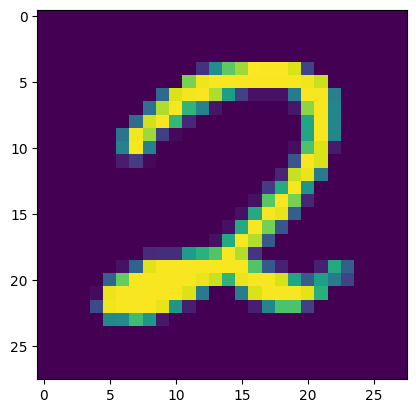

In [34]:
i = 35 # Foi escolhida uma amostra aleatória na base para visualizar o resultado da classificação
result = model.predict(x_test[i:i+1])
plt.imshow(x_test_original[i])
result_idx = np.argmax(result)
print(f'result: {result_idx}, expected: {y_test[i]}, class: {class_names[result_idx]}')
print()
result